# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
api_key

'51c4070b3421d7fbe7a78c779136ff04'

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
total_cities = []
city = []
temp = []
lat = []
cloud = []
windsp = []
humid = []

url = "http://api.openweathermap.org/data/2.5/weather?"
unit = "imperial"

count = 0
setcount =1

for x in cities:
    try:
        citys = x.replace(' ','%20')
        query_url = url + "appid=" + api_key + "&units="+unit+ "&q=" + citys
        response = requests.get(query_url).json()
        count += 1
        
        print('Processing record %s of set %s| %s' % (count, setcount, city))
        print(url)
        #total_cities.append(x)
        city.append(response["name"])
        temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        cloud.append(response["clouds"]["all"])
        windsp.append(response["wind"]["speed"])
        humid.append(response["main"]["humidity"])
    except:
        print("Missing city... skip.")
        #total_cities.remove(x)

    if count == 50:
        count = 0
        setcount += 1
print("Data retrieval done")

Processing record 1 of set 1| []
http://api.openweathermap.org/data/2.5/weather?
Processing record 2 of set 1| ['Barrow']
http://api.openweathermap.org/data/2.5/weather?
Processing record 3 of set 1| ['Barrow', 'Rikitea']
http://api.openweathermap.org/data/2.5/weather?
Processing record 4 of set 1| ['Barrow', 'Rikitea', 'Atuona']
http://api.openweathermap.org/data/2.5/weather?
Processing record 5 of set 1| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa']
http://api.openweathermap.org/data/2.5/weather?
Processing record 6 of set 1| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe']
http://api.openweathermap.org/data/2.5/weather?
Processing record 7 of set 1| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas']
http://api.openweathermap.org/data/2.5/weather?
Processing record 8 of set 1| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia']
http://api.openweathermap.org/data/2.5/weather?
Processing record 9 of set 1| ['Barrow',

Processing record 32 of set 1| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas']
http://api.openweathermap.org/data/2.5/weather?
Processing record 33 of set 1| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira']
http://api.openweathermap.org/data/2.5/weather?
Processing record 34 of set 1| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Al

Processing record 48 of set 1| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini']
http://api.openweathermap.org/data/2.5/weather?
Processing record 49 of set 1| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira',

Processing record 11 of set 2| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur']
http://api.openweathermap.org/data/2.5/weather?
Processing record 12 of set 2| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Che

Processing record 21 of set 2| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen']
http://api.openweathermap.org/data/2.5/weather?
Processing record 22 of set 2| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatana

Processing record 30 of set 2| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge']
http://api.openweathermap.org/data/2.5/weather?
Processing record 31 of set 2| ['Barrow', 'Rikitea', 'Atuo

Processing record 39 of set 2| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 47 of set 2| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 4 of set 3| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta F

Processing record 11 of set 3| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 18 of set 3| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 24 of set 3| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 30 of set 3| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 37 of set 3| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 42 of set 3| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 47 of set 3| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 2 of set 4| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta F

Processing record 7 of set 4| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta F

Processing record 12 of set 4| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 17 of set 4| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 22 of set 4| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 27 of set 4| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 31 of set 4| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 35 of set 4| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 39 of set 4| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 44 of set 4| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 49 of set 4| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 3 of set 5| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta F

Processing record 7 of set 5| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta F

Processing record 11 of set 5| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 14 of set 5| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 18 of set 5| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 22 of set 5| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 26 of set 5| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 30 of set 5| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 34 of set 5| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 38 of set 5| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 42 of set 5| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 45 of set 5| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 48 of set 5| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 2 of set 6| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta F

Processing record 5 of set 6| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta F

Processing record 9 of set 6| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta F

Processing record 12 of set 6| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 16 of set 6| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 19 of set 6| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 22 of set 6| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 25 of set 6| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 28 of set 6| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 31 of set 6| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 34 of set 6| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 38 of set 6| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 41 of set 6| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 44 of set 6| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 47 of set 6| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 50 of set 6| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 4 of set 7| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta F

Processing record 7 of set 7| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta F

Processing record 10 of set 7| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 13 of set 7| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 16 of set 7| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 19 of set 7| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 23 of set 7| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 26 of set 7| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 29 of set 7| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 32 of set 7| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 35 of set 7| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 38 of set 7| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 41 of set 7| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 44 of set 7| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 47 of set 7| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 1 of set 8| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta F

Processing record 4 of set 8| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta F

Processing record 7 of set 8| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta F

Processing record 10 of set 8| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 12 of set 8| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 14 of set 8| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 16 of set 8| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 18 of set 8| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 20 of set 8| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 22 of set 8| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 24 of set 8| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 26 of set 8| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 28 of set 8| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 30 of set 8| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 32 of set 8| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 34 of set 8| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 36 of set 8| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 38 of set 8| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 40 of set 8| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 42 of set 8| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 44 of set 8| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 46 of set 8| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 48 of set 8| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 50 of set 8| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 2 of set 9| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta F

Processing record 4 of set 9| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta F

Processing record 7 of set 9| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta F

Processing record 9 of set 9| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta F

Processing record 11 of set 9| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 14 of set 9| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 16 of set 9| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 19 of set 9| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 21 of set 9| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 23 of set 9| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 25 of set 9| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 26 of set 9| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 28 of set 9| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 30 of set 9| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 32 of set 9| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 34 of set 9| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 36 of set 9| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 38 of set 9| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 40 of set 9| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 42 of set 9| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 44 of set 9| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 46 of set 9| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 48 of set 9| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 1 of set 10| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 3 of set 10| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 5 of set 10| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 7 of set 10| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 10 of set 10| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta

Processing record 12 of set 10| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta

Processing record 14 of set 10| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta

Processing record 16 of set 10| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta

Processing record 18 of set 10| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta

Processing record 20 of set 10| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta

Processing record 22 of set 10| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta

Processing record 24 of set 10| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta

Processing record 25 of set 10| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta

Processing record 27 of set 10| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta

Processing record 29 of set 10| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta

Processing record 32 of set 10| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta

Processing record 34 of set 10| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta

Processing record 36 of set 10| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta

Processing record 38 of set 10| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta

Processing record 40 of set 10| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta

Processing record 42 of set 10| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta

Processing record 44 of set 10| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta

Processing record 46 of set 10| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta

Processing record 49 of set 10| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta

Processing record 1 of set 11| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 3 of set 11| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 6 of set 11| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 8 of set 11| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 10 of set 11| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta

Processing record 12 of set 11| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta

Processing record 14 of set 11| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta

Processing record 16 of set 11| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta

Processing record 18 of set 11| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta

Processing record 20 of set 11| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta

Processing record 22 of set 11| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta

Processing record 24 of set 11| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta

Processing record 26 of set 11| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta

Processing record 29 of set 11| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta

Processing record 32 of set 11| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta

Processing record 34 of set 11| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta

Processing record 37 of set 11| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta

Processing record 39 of set 11| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta

Processing record 41 of set 11| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta

Processing record 43 of set 11| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta

Processing record 45 of set 11| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta

Processing record 47 of set 11| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta

Processing record 49 of set 11| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta

Processing record 1 of set 12| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 3 of set 12| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 6 of set 12| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 8 of set 12| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 10 of set 12| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta

Processing record 12 of set 12| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta

Processing record 14 of set 12| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta

Processing record 16 of set 12| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta

Processing record 18 of set 12| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta

Processing record 20 of set 12| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta

Processing record 22 of set 12| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta

Processing record 24 of set 12| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta

Processing record 26 of set 12| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta

Processing record 28 of set 12| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta

Processing record 30 of set 12| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta

Processing record 32 of set 12| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta

Processing record 34 of set 12| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta

Processing record 36 of set 12| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta

Processing record 38 of set 12| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta

Processing record 40 of set 12| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta

Processing record 42 of set 12| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta

Processing record 44 of set 12| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta

Processing record 46 of set 12| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta

Processing record 48 of set 12| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta

Processing record 50 of set 12| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta

Processing record 2 of set 13| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 5 of set 13| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 7 of set 13| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 9 of set 13| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta 

Processing record 11 of set 13| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta

Processing record 13 of set 13| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta

Processing record 15 of set 13| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta

Processing record 18 of set 13| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta

Processing record 20 of set 13| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta

Processing record 23 of set 13| ['Barrow', 'Rikitea', 'Atuona', 'Kapaa', 'Saint-Philippe', 'Calderitas', 'Comodoro Rivadavia', 'Bluff', 'Albany', 'Namatanai', 'Salinas', 'Nikolskoye', 'Puerto Ayora', 'Bredasdorp', 'Castro', 'Ushuaia', 'Cape Town', 'Coquimbo', 'Cherskiy', 'Bombay', 'Hobart', 'Alofi', 'Kodiak', 'Samarai', 'College', 'Shrewsbury', 'Douentza', 'Lazaro Cardenas', 'Cidreira', 'Methven', 'Hervey Bay', 'Hong Gai', 'Hermanus', 'Vila Franca do Campo', 'Qaanaaq', 'Airai', 'Te Anau', 'Tuktoyaktuk', 'San Juan', 'Mataura', 'Hudson Bay', 'Gwanda', 'Vaini', 'Chuy', 'Axim', 'Mar del Plata', 'Nikki', 'Nome', 'Yellowknife', 'Olinda', 'Punta Arenas', 'Jardim', 'Dudinka', 'Neyshabur', 'Hilo', 'Vestmannaeyjar', 'Portland', 'Waterloo', 'Pucara', 'Port Alfred', 'Avarua', 'Ankang', 'Skibbereen', 'Busselton', 'Thompson', 'New Norfolk', 'Sitka', 'Majene', 'Butia', 'Kolyshley', 'Southbridge', 'Cap Malheureux', 'Shubarkuduk', 'Mazagao', 'Butaritari', 'Hualmay', 'Port Barton', 'Saint-Joseph', 'Alta

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
data_df=pd.DataFrame({"City":city,
                      "Latitude":lat,
                      "Temperature":temp,
                      "Cloudiness":cloud,
                      "Windspeed":windsp,
                      "Humidity":humid,
                      })

In [5]:
data_df.head()

,City,Latitude,Temperature,Cloudiness,Windspeed,Humidity
0,Barrow,-38.31,60.71,0,7.40,77
1,Rikitea,-23.12,73.40,0,17.36,100
2,Atuona,-9.80,80.47,76,18.54,100
3,Kapaa,22.08,84.02,40,14.99,62
4,Saint-Philippe,45.36,41.90,90,5.82,86


In [6]:
exported_data=data_df.to_csv('WeatherData.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

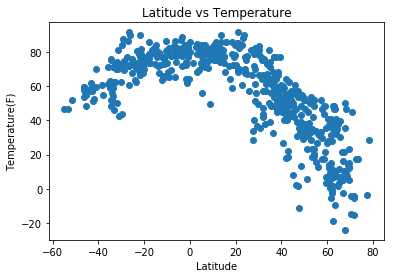

In [7]:
x_axis=data_df["Latitude"]
y_axis=data_df["Temperature"]
plt.scatter(x_axis,y_axis)
plt.xlabel("Latitude")
plt.ylabel("Temperature(F)")
plt.title("Latitude vs Temperature")
plt.savefig('LatitudevsTemp')
plt.show()

#### Latitude vs. Humidity Plot

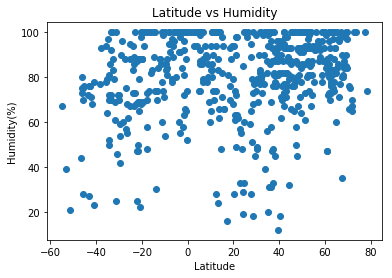

In [8]:

#Latitude vs Humidity
x_axis=data_df["Latitude"]
y_axis=data_df["Humidity"]
plt.scatter(x_axis,y_axis)
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title("Latitude vs Humidity")
plt.savefig("LatitudevsHumidity")
plt.show()

#### Latitude vs. Cloudiness Plot

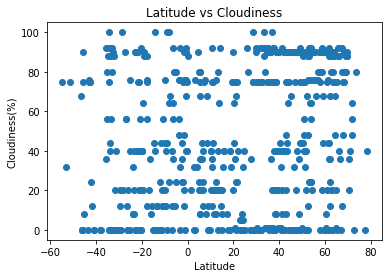

In [9]:
#Latitude vs Cloudiness
x_axis=data_df["Latitude"]
y_axis=data_df["Cloudiness"]
plt.scatter(x_axis,y_axis)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title("Latitude vs Cloudiness")
plt.savefig("LatitudevsCloudiness")
plt.show()

#### Latitude vs. Wind Speed Plot

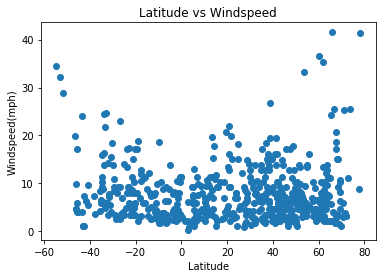

In [10]:
x_axis=data_df["Latitude"]
y_axis=data_df["Windspeed"]
plt.scatter(x_axis,y_axis)
plt.xlabel("Latitude")
plt.ylabel("Windspeed(mph)")
plt.title("Latitude vs Windspeed")
plt.savefig("LatitudevsWindspeed")
plt.show()